In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.getcwd()

'/Users/abc/Downloads/min/Codes/LSTM-CRF-NER/time_test'

In [3]:
os.chdir('a')

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
print(len(tmp_data))
print(len(label))
print(len(BS))

4536
4536
4536


In [25]:
tmp_data = []
label = []
BS = []
num_batch = [25,13,7, 11,6,3]
for ind2, i in enumerate([4, 8, 16, 32, 64, 128]):
    with open('log_gpu_BS_'+ str(i) +'_max_size_char_[6].txt', 'r') as f:
        tmp_1 = []
        tmp_2 = []
        tmp_3 = []
        for ind, line in enumerate(f):
            if ind%num_batch[ind2] < 2:
                continue
            data = line.strip().split(',')
#             if i > 16:
#                 tmp_1.append(float(data[0])-(1.84-0.65))
#                 tmp_2.append(float(data[1])-(1.84-0.65))
#                 tmp_3.append(float(data[2])-(1.84-0.65))
#             else:
            tmp_1.append(float(data[0]))
            tmp_2.append(float(data[1]))
            tmp_3.append(float(data[2]))
        tmp_data = tmp_data + tmp_1 + tmp_2 + tmp_3
        print(len(tmp_data))
        tmp_len = len(tmp_1)
        BS = BS + [str(i)]*(3*tmp_len)
        for exper in ['word', 'char', 'word_char']:
            label = label + [exper]*tmp_len

Df = pd.DataFrame({'time_per_batch': tmp_data, 'experiment': label, 'BS': BS})
Df

2070
3060
3510
4320
4680
4770


,time_per_batch,experiment,BS
0,0.698133,word,4
1,0.652896,word,4
2,0.660645,word,4
3,0.656285,word,4
4,0.646912,word,4
...,...,...,...
4765,2.749407,word_char,128
4766,2.767273,word_char,128
4767,2.805594,word_char,128
4768,2.729541,word_char,128


In [25]:
Df.iloc[0]['time_per_batch']

'0.6528961658477783'

In [24]:
i = 128
DF_all = pd.read_csv('log_gpu_BS_'+ str(i) +'_max_size_char_[6].txt')
a = []#[i for i in range(len(DF_all)) if i%30==29 or i%30<2]
DF_all.drop(a, inplace=True)
BS = [str(i)]*len(DF_all)
DF_all['BS'] = BS

# for i in [8]:#[32,64,128]:#[4,8,16,32, 64,128]:
#     DF = pd.read_csv('log_gpu_BS_'+ str(i) +'_max_size_char_[6].txt')
#     a = [i for i in range(len(DF)) if i%30==29 or i%30<2]
    
#     DF.drop(a, inplace=True)
#     BS = [str(i)]*len(DF)
#     DF['BS'] = BS
#     DF_all = DF_all.append(DF)
DF_all.reset_index(inplace=True,drop = True)
DF_all

,exp1,exp2,exp3,BS
0,2.267843,2.639107,2.723949,128
1,1.807084,2.590639,2.793964,128
2,1.789829,2.275245,2.371651,128
3,1.870886,2.558805,2.709578,128
4,1.865058,2.673848,2.687540,128
...,...,...,...,...
85,1.893432,2.618105,2.729541,128
86,1.928979,2.229172,2.342354,128
87,1.755224,2.577651,2.772371,128
88,1.891664,2.579390,2.755997,128


In [6]:
DF_all.describe()

,exp1,exp2,exp3
count,1890.000000,1890.000000,1890.000000
mean,0.673563,0.683013,0.747016
std,0.015163,0.060480,0.064559
min,0.636172,0.602517,0.674142
25%,0.662730,0.643195,0.706096
50%,0.672836,0.657743,0.719024
75%,0.684268,0.718598,0.779880
max,0.713056,0.875706,0.948788


In [178]:
DF = pd.read_csv('log_gpu_BS_4_max_size_char_[6].txt')
DF.columns

Index(['exp1', ' exp2', ' exp3'], dtype='object')

In [167]:
a = [i for i in range(len(DF)) if i%30==29 or i%30<2]

In [168]:
DF.drop(a, inplace=True)

In [179]:
DF2 = pd.read_csv('log_gpu_BS_8_max_size_char_[6].txt')
DF2.columns

Index(['exp1', ' exp2', ' exp3'], dtype='object')

In [173]:
b = [i for i in range(len(DF2)) if i%30==29 or i%30<2]

In [174]:
DF2.drop(b, inplace=True)

In [154]:
DF

,exp1,exp2,exp3
2,1.789829,1.850878,2.013367
3,1.870886,1.867460,2.024139
4,1.865058,1.910462,1.986912
5,1.838259,1.921756,2.028557
6,1.827073,1.898861,2.079545
...,...,...,...
324,1.880907,1.908088,2.066178
325,1.835785,1.877738,1.981929
326,1.862459,1.802504,2.038191
327,1.910715,1.864549,2.022583


In [52]:
DF.loc[DF['exp1'] <=  x['exp1']['mean']+2*x['exp1']['std']]

,exp1,exp2,exp3
1,1.807084,1.873301,2.102787
2,1.789829,1.850878,2.013367
3,1.870886,1.867460,2.024139
4,1.865058,1.910462,1.986912
5,1.838259,1.921756,2.028557
...,...,...,...
325,1.835785,1.877738,1.981929
326,1.862459,1.802504,2.038191
327,1.910715,1.864549,2.022583
328,1.867522,1.876137,1.975254


KeyError: 'exp2'

In [37]:
x = DF.describe()
print(x['exp1']['mean'])

1.851167496767911


In [11]:
DF.describe()

,exp1,exp2,exp3
count,81.000000,81.000000,81.000000
mean,1.844149,2.475272,2.612206
std,0.060554,0.163290,0.163540
min,1.633904,2.177370,2.340541
25%,1.827073,2.275245,2.420061
50%,1.845485,2.551557,2.689017
75%,1.879494,2.591034,2.740892
max,1.974545,2.673848,2.822655


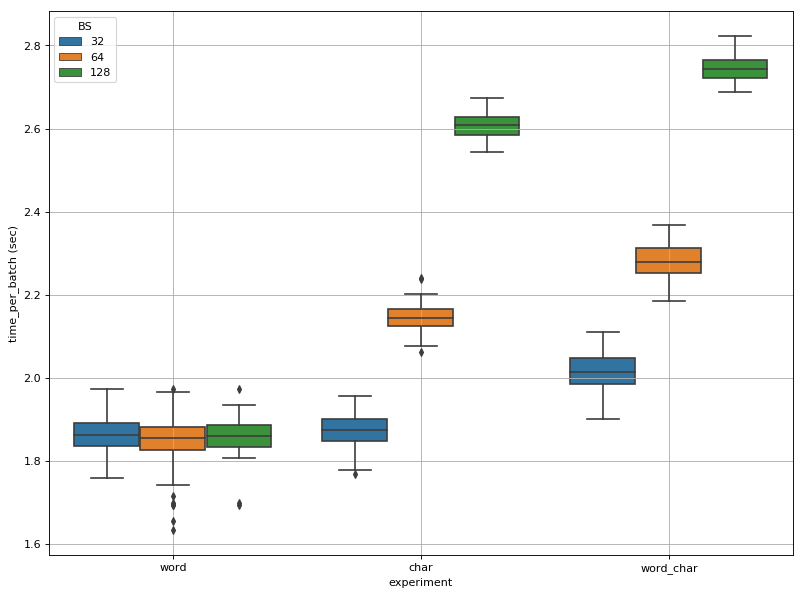

In [35]:
plt.figure(figsize=(12, 9), dpi=80)
Df['time_per_batch (sec)'] = Df['time_per_batch']
ax = sns.boxplot(x="experiment", y="time_per_batch (sec)", data=Df, hue_order=[ '32', '64', '128'], hue="BS",  whis=1.5)
plt.grid(which='both')

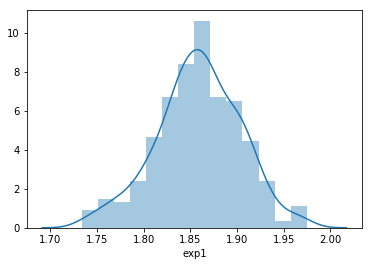

In [64]:
ax = sns.distplot(DF['exp1'])

In [ ]:
ax = sns.distplot(DF['exp1'])

In [83]:
DF['exp1']

0      2.267843
1      1.807084
2      1.789829
3      1.870886
4      1.865058
         ...   
325    1.835785
326    1.862459
327    1.910715
328    1.867522
329    1.740854
Name: exp1, Length: 330, dtype: float64

In [81]:
DF[['exp1','exp2','exp3']][

KeyError: "['exp2', 'exp3'] not in index"